In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap



In [3]:
#technology = "microarray" # "RNAseq"
technology = "RNAseq" #microarray

In [4]:

# Assuming your DataFrame is called cts and has gene expression data
# Assuming cts is a pandas DataFrame with gene expression data
if technology == "microarray":
    cts = pd.read_csv("/home/karen/Documents/phd/Data/trainign_dataset_51270_microarray_unadjusted.csv")
elif technology == "RNAseq":
    cts = pd.read_csv("/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/RNAseq_All_abundances_unadjusted.csv")

metadata =   cts[["Experiment", "Sample", "Age"]]


In [5]:
metadata

,Experiment,Sample,Age
0,GSE164471,SRR13388732,23.0
1,GSE164471,SRR13388733,28.0
2,GSE164471,SRR13388734,31.0
3,GSE164471,SRR13388735,31.0
4,GSE164471,SRR13388736,35.0
...,...,...,...
265,GSE129643,SRR8882198,27.0
266,GSE129643,SRR8882200,33.0
267,GSE129643,SRR8882202,37.0
268,GSE129643,SRR8882203,38.0


# Function

In [6]:
import matplotlib.pyplot as plt

def generate_colors(n):
        colormap = plt.cm.get_cmap('tab20', n)
        colors = [colormap(i) for i in range(n)]
        return colors
    
def blot_expression(subset_data, experiments, count_experiments, colors=None, title=None, save=False):
    
    if colors is None:
        colors = generate_colors(len(experiments))
    colored = np.sum(list(count_experiments.values()))
    if len(subset_data.columns) != colored:
        raise "the columns and the experiments should be same length"
        return None
    if len(count_experiments) != len(experiments):
        raise "the count_experiments and the experiments should be same length"
        return None
    if title is None:
        title = 'Expression of Gene Expression Across Experiments'
    boxes=[]
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))
    start_c = 0
    end_c = len(subset_data.columns)
    color_i = 0
    for exp in experiments:
        end_c=start_c + count_experiments[exp]
        # Boxplot for the first 84 columns
        box= ax.boxplot(subset_data.iloc[:, start_c:end_c], positions=list(range(start_c+1,end_c+1)), showfliers=False, patch_artist=True,
                          boxprops=dict(facecolor=colors[color_i], color=colors[color_i])
                          )
        start_c = end_c
        boxes.append(box)
        color_i=color_i+1
                          
    
    # Set labels and titles
    ax.set_title(title)
    ax.set_ylabel('Expression')
    
    # Adjust legend
    legends_list = [b["boxes"][0] for b in boxes]
    ax.legend(legends_list, experiments)
    
    plt.tight_layout()
    if save:
        plt.savefig(save)
    plt.show()


In [7]:
cts

,Sample,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,...,ENSG00000285472.1,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1,Experiment,Age,Sample.1
0,SRR13388732,3.346531,0.000000,7.023940,0.705439,3.879328,0.275243,7.746350,6.574690,8.136232,...,0.311412,0.439481,0.000000,0.000000,0.000000,4.61464,0.142626,GSE164471,23.0,SRR13388732
1,SRR13388733,7.351350,0.000000,13.916237,4.891812,2.885359,0.190321,16.006573,6.498180,10.725815,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.80200,1.119540,GSE164471,28.0,SRR13388733
2,SRR13388734,7.671751,1.624510,18.720030,3.338030,9.629021,0.204143,19.061782,7.368540,11.420381,...,0.000000,0.167163,0.000000,0.418267,0.000000,2.37204,0.915094,GSE164471,31.0,SRR13388734
3,SRR13388735,2.547355,0.184514,6.876067,0.888782,1.684829,0.000000,3.182537,2.415355,2.242850,...,0.000000,0.148800,0.000000,0.000000,0.000000,5.20632,0.813373,GSE164471,31.0,SRR13388735
4,SRR13388736,15.728966,0.613411,14.120093,3.123864,10.457990,0.198544,12.340000,19.441760,18.223213,...,1.544910,1.069550,0.379249,0.000000,0.000000,3.39066,0.707502,GSE164471,35.0,SRR13388736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,SRR8882198,1.832683,0.000000,2.567454,0.617939,1.599221,0.338734,2.457767,1.825564,5.485286,...,0.043890,0.109543,0.131619,0.115910,0.023606,1.51306,0.347812,GSE129643,27.0,SRR8882198
266,SRR8882200,2.251713,0.000000,2.120141,0.895718,2.379145,0.418938,1.489740,2.676330,1.880811,...,0.000000,0.156295,0.000000,0.078959,0.000000,1.51426,0.129535,GSE129643,33.0,SRR8882200
267,SRR8882202,1.387888,0.057285,5.080017,1.439485,1.263484,0.194929,3.880208,2.066827,5.226251,...,0.000000,0.000000,0.090303,0.000000,0.000000,2.29948,0.106928,GSE129643,37.0,SRR8882202
268,SRR8882203,1.048829,0.000000,3.248294,1.789166,0.405673,0.152905,2.071356,1.466217,3.389388,...,0.000000,0.057207,0.000000,0.000000,0.000295,2.80874,0.115525,GSE129643,38.0,SRR8882203


In [8]:
sample_order = cts["Sample"].tolist()  # Get the order of samples in cts
experiment_order = cts["Experiment"].tolist() 
age_order = cts["Age"].tolist()


In [9]:
df =pd.DataFrame(experiment_order)
count_experiments = dict(df[0].value_counts())
count_experiments
experiments = list(count_experiments)
experiments

['GSE157585', 'GSE167186', 'GSE164471', 'GSE60590', 'GSE129643', 'GSE152558']

In [10]:
def map_to_category(age):
    if age <= 35:
        return "Young"
    elif age > 65:
        return "Old"
    else:
        return "MiddleAge"

# Map values in age_order to categories
age_order = [map_to_category(age) for age in age_order]

In [11]:
cts

,Sample,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,...,ENSG00000285472.1,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1,Experiment,Age,Sample.1
0,SRR13388732,3.346531,0.000000,7.023940,0.705439,3.879328,0.275243,7.746350,6.574690,8.136232,...,0.311412,0.439481,0.000000,0.000000,0.000000,4.61464,0.142626,GSE164471,23.0,SRR13388732
1,SRR13388733,7.351350,0.000000,13.916237,4.891812,2.885359,0.190321,16.006573,6.498180,10.725815,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.80200,1.119540,GSE164471,28.0,SRR13388733
2,SRR13388734,7.671751,1.624510,18.720030,3.338030,9.629021,0.204143,19.061782,7.368540,11.420381,...,0.000000,0.167163,0.000000,0.418267,0.000000,2.37204,0.915094,GSE164471,31.0,SRR13388734
3,SRR13388735,2.547355,0.184514,6.876067,0.888782,1.684829,0.000000,3.182537,2.415355,2.242850,...,0.000000,0.148800,0.000000,0.000000,0.000000,5.20632,0.813373,GSE164471,31.0,SRR13388735
4,SRR13388736,15.728966,0.613411,14.120093,3.123864,10.457990,0.198544,12.340000,19.441760,18.223213,...,1.544910,1.069550,0.379249,0.000000,0.000000,3.39066,0.707502,GSE164471,35.0,SRR13388736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,SRR8882198,1.832683,0.000000,2.567454,0.617939,1.599221,0.338734,2.457767,1.825564,5.485286,...,0.043890,0.109543,0.131619,0.115910,0.023606,1.51306,0.347812,GSE129643,27.0,SRR8882198
266,SRR8882200,2.251713,0.000000,2.120141,0.895718,2.379145,0.418938,1.489740,2.676330,1.880811,...,0.000000,0.156295,0.000000,0.078959,0.000000,1.51426,0.129535,GSE129643,33.0,SRR8882200
267,SRR8882202,1.387888,0.057285,5.080017,1.439485,1.263484,0.194929,3.880208,2.066827,5.226251,...,0.000000,0.000000,0.090303,0.000000,0.000000,2.29948,0.106928,GSE129643,37.0,SRR8882202
268,SRR8882203,1.048829,0.000000,3.248294,1.789166,0.405673,0.152905,2.071356,1.466217,3.389388,...,0.000000,0.057207,0.000000,0.000000,0.000295,2.80874,0.115525,GSE129643,38.0,SRR8882203


In [12]:
cts_processed = cts.copy()
#
if technology == "microarray":
    cts_processed.drop(['Age', 'Sex', 'Status', 'Experiment'], axis=1, inplace=True)
elif technology == "RNAseq":
    cts_processed.drop(['Age', 'Sample.1', 'Experiment'], axis=1, inplace=True)
cts_processed.set_index("Sample",  inplace=True)

In [13]:
#!pip install combat

In [14]:
from combat.pycombat import pycombat
data = cts.copy()

# Extract batch information into a separate variable
# Replace 'batch_column_name' with the name of the column containing batch information
batch_info = data['Experiment']
age_list = data["Age"]
# Remove the batch column from the data
if technology == "microarray":
    data.drop(['Age', 'Sex', 'Status', 'Experiment'], axis=1, inplace=True)

elif technology == "RNAseq":
    data.drop(['Age', 'Sample.1', 'Experiment'], axis=1, inplace=True)


data.set_index("Sample", inplace=True)


In [15]:
data= data.T

In [16]:
colors=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive']

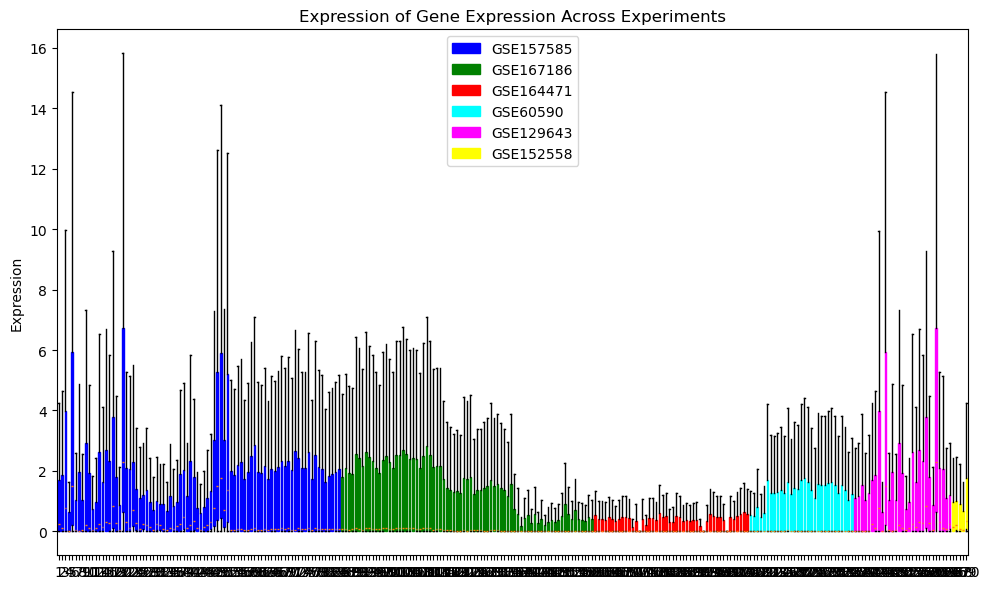

In [17]:

blot_expression(data, experiments, count_experiments, colors=colors, save=f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_unalteraded.png")



In [18]:

data = (data - data.mean()) / data.std()

data.fillna(0, inplace=True)

In [19]:
data.columns

Index(['SRR13388732', 'SRR13388733', 'SRR13388734', 'SRR13388735',
       'SRR13388736', 'SRR13388737', 'SRR13388738', 'SRR13388739',
       'SRR13388740', 'SRR13388741',
       ...
       'SRR8882190', 'SRR8882191', 'SRR8882192', 'SRR8882195', 'SRR8882196',
       'SRR8882198', 'SRR8882200', 'SRR8882202', 'SRR8882203', 'SRR8882219'],
      dtype='object', name='Sample', length=270)

In [20]:
data[data.isna().any(axis=1)]

Sample,SRR13388732,SRR13388733,SRR13388734,SRR13388735,SRR13388736,SRR13388737,SRR13388738,SRR13388739,SRR13388740,SRR13388741,...,SRR8882190,SRR8882191,SRR8882192,SRR8882195,SRR8882196,SRR8882198,SRR8882200,SRR8882202,SRR8882203,SRR8882219


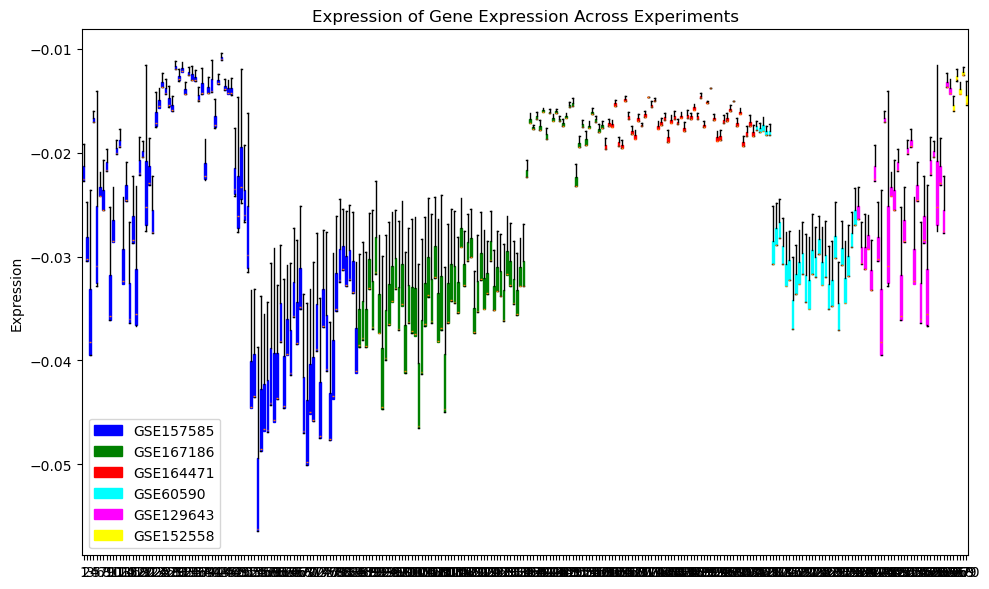

In [21]:
blot_expression(data, experiments, count_experiments, colors=colors, save=f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_combat_normalized.png")

In [22]:
age_list

0      23.0
1      28.0
2      31.0
3      31.0
4      35.0
       ... 
265    27.0
266    33.0
267    37.0
268    38.0
269    72.0
Name: Age, Length: 270, dtype: float64

In [23]:
batch_info

0      GSE164471
1      GSE164471
2      GSE164471
3      GSE164471
4      GSE164471
         ...    
265    GSE129643
266    GSE129643
267    GSE129643
268    GSE129643
269    GSE129643
Name: Experiment, Length: 270, dtype: object

In [77]:
def map_to_category(age):
    if age < 35:
        return "Young"
    elif age > 65:
        return "Old"
    else:
        return "MiddleAge"

covariates = pd.DataFrame({
    'batch': batch_info,
    'age': [map_to_category(age) for age in age_list] 
})

In [25]:
data

Sample,SRR13388732,SRR13388733,SRR13388734,SRR13388735,SRR13388736,SRR13388737,SRR13388738,SRR13388739,SRR13388740,SRR13388741,...,SRR8882190,SRR8882191,SRR8882192,SRR8882195,SRR8882196,SRR8882198,SRR8882200,SRR8882202,SRR8882203,SRR8882219
ENSG00000000003.14,-0.019945,-0.021474,-0.027244,-0.015458,-0.012505,-0.021658,-0.020410,-0.018321,-0.029712,-0.023722,...,-0.013540,-0.020061,-0.024260,-0.012577,-0.012732,-0.014899,-0.012002,-0.013633,-0.012044,-0.014223
ENSG00000000005.5,-0.022699,-0.030376,-0.036875,-0.016925,-0.032016,-0.024174,-0.025551,-0.021723,-0.036062,-0.028005,...,-0.026891,-0.023140,-0.026934,-0.013698,-0.014245,-0.015944,-0.013044,-0.014339,-0.012521,-0.015102
ENSG00000000419.12,-0.016919,-0.013524,-0.009650,-0.012769,-0.014582,-0.017378,-0.005941,-0.014242,-0.017971,-0.015232,...,-0.022871,-0.011344,-0.017907,-0.011138,-0.010860,-0.014480,-0.012063,-0.011673,-0.011044,-0.012294
ENSG00000000457.13,-0.022119,-0.024452,-0.034146,-0.016488,-0.028775,-0.023381,-0.021239,-0.020325,-0.030124,-0.025721,...,-0.023353,-0.021352,-0.024625,-0.012525,-0.013726,-0.015592,-0.012630,-0.013605,-0.011708,-0.014191
ENSG00000000460.16,-0.019507,-0.026882,-0.024127,-0.015993,-0.019309,-0.021414,-0.021425,-0.019926,-0.028292,-0.020576,...,-0.003892,-0.019378,-0.023615,-0.012651,-0.013166,-0.015032,-0.011943,-0.013699,-0.012337,-0.013641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285480.1,-0.022699,-0.030376,-0.039462,-0.017040,-0.032318,-0.023451,-0.023258,-0.021723,-0.036062,-0.028600,...,-0.027561,-0.022912,-0.025973,-0.013698,-0.014375,-0.015869,-0.013044,-0.014321,-0.012521,-0.015439
ENSG00000285491.1,-0.022699,-0.030376,-0.038796,-0.017040,-0.032808,-0.024174,-0.025551,-0.021723,-0.036062,-0.028600,...,-0.026426,-0.023140,-0.027708,-0.013698,-0.014375,-0.015878,-0.013008,-0.014369,-0.012521,-0.015086
ENSG00000285505.1,-0.022699,-0.030376,-0.039462,-0.017040,-0.032808,-0.024174,-0.025551,-0.021723,-0.036062,-0.028600,...,-0.027561,-0.023093,-0.027708,-0.013698,-0.014375,-0.015931,-0.013044,-0.014369,-0.012521,-0.015394
ENSG00000285508.1,-0.018902,-0.013662,-0.035684,-0.013806,-0.028431,-0.019287,-0.025551,-0.020104,-0.029194,-0.024663,...,-0.025732,-0.020898,-0.025750,-0.013056,-0.014277,-0.015081,-0.012343,-0.013149,-0.011244,-0.015439


In [80]:
data_corrected = pycombat(data=data,batch=batch_info, mod=[], precision=0.1)


data_corrected = pycombat(
    data=data,
    batch=batch_info,
    mod=[map_to_category(age) for age in age_list] ,
    precision=0.1
)

Found 6 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data
Found 6 batches.
Adjusting for 2 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


In [81]:
data_corrected

Sample,SRR13388732,SRR13388733,SRR13388734,SRR13388735,SRR13388736,SRR13388737,SRR13388738,SRR13388739,SRR13388740,SRR13388741,...,SRR8882190,SRR8882191,SRR8882192,SRR8882195,SRR8882196,SRR8882198,SRR8882200,SRR8882202,SRR8882203,SRR8882219
ENSG00000000003.14,-0.024640,-0.025765,-0.030008,-0.021340,-0.019630,-0.026361,-0.025443,-0.023907,-0.032284,-0.027878,...,-0.018996,-0.023768,-0.026842,-0.017648,-0.017762,-0.019347,-0.017227,-0.018888,-0.017725,-0.019496
ENSG00000000005.5,-0.027469,-0.032593,-0.036930,-0.023615,-0.034585,-0.029351,-0.030270,-0.027715,-0.037285,-0.031908,...,-0.029198,-0.026652,-0.029227,-0.019100,-0.019471,-0.020624,-0.018656,-0.020402,-0.019168,-0.021197
ENSG00000000419.12,-0.007903,-0.006575,-0.005061,-0.006280,-0.005184,-0.006277,-0.001806,-0.005051,-0.006509,-0.005438,...,-0.007899,-0.002541,-0.005592,-0.005363,-0.005234,-0.006916,-0.005793,-0.004026,-0.003733,-0.002983
ENSG00000000457.13,-0.026124,-0.027678,-0.034131,-0.022375,-0.031186,-0.027595,-0.026169,-0.025560,-0.032084,-0.029152,...,-0.025857,-0.024489,-0.026726,-0.017630,-0.018451,-0.019726,-0.017702,-0.018965,-0.017669,-0.019596
ENSG00000000460.16,-0.026015,-0.031369,-0.029369,-0.023463,-0.026442,-0.027971,-0.027979,-0.026890,-0.032965,-0.027362,...,-0.013814,-0.024841,-0.027858,-0.019334,-0.019700,-0.021029,-0.018829,-0.020680,-0.019710,-0.020756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285480.1,-0.026753,-0.031722,-0.037602,-0.023091,-0.033844,-0.028105,-0.027980,-0.026987,-0.036267,-0.031438,...,-0.028935,-0.025899,-0.027898,-0.018724,-0.019165,-0.020141,-0.018296,-0.019981,-0.018806,-0.021020
ENSG00000285491.1,-0.027502,-0.032605,-0.038201,-0.023741,-0.035117,-0.029379,-0.030294,-0.027750,-0.037280,-0.032320,...,-0.028896,-0.026682,-0.029759,-0.019168,-0.019623,-0.020636,-0.018702,-0.020491,-0.019246,-0.021255
ENSG00000285505.1,-0.027457,-0.032541,-0.038558,-0.023709,-0.035025,-0.029308,-0.030219,-0.027684,-0.037180,-0.032238,...,-0.029621,-0.026624,-0.029719,-0.019150,-0.019604,-0.020647,-0.018711,-0.020452,-0.019212,-0.021461
ENSG00000285508.1,-0.024058,-0.020310,-0.036063,-0.020413,-0.031728,-0.025187,-0.029668,-0.025772,-0.032274,-0.029032,...,-0.028055,-0.024589,-0.028068,-0.017906,-0.018781,-0.019357,-0.017394,-0.018820,-0.017454,-0.020674


IndexError: list index out of range

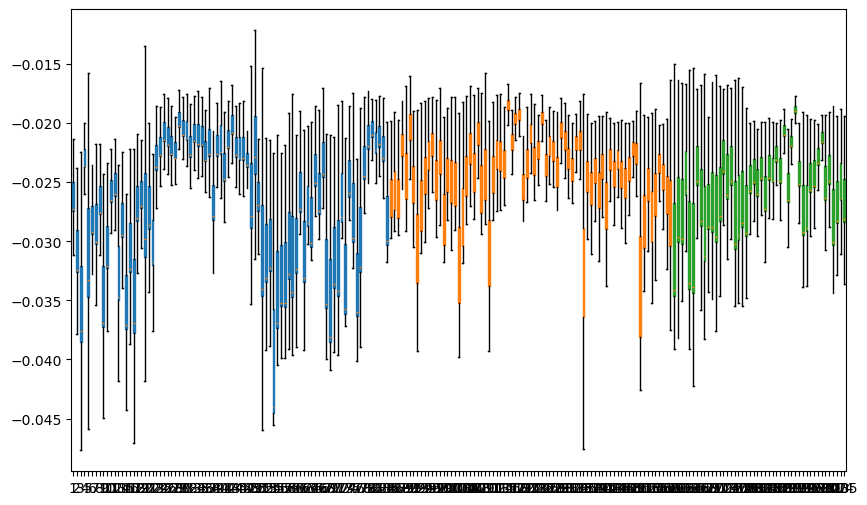

In [82]:
blot_expression(data_corrected, experiments, count_experiments, colors=colors, save=f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_adjustedCombat.png")

In [ ]:
#blot_expression(data_corrected, experiments, count_experiments, colors=["blue", "green", "orange", "pink","red","purple"])

In [83]:
data_corrected = data_corrected.T

# Testing batch correction

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Set significance threshold (alpha level)

def plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05):
    # Plot histograms of p-values before and after batch correction
    plt.figure(figsize=(10, 5))
    plt.hist(p_values_before, bins=50, color='blue', alpha=0.5, label='Before Correction')
    plt.hist(p_values_after, bins=50, color='green', alpha=0.5, label='After Correction')
    plt.axvline(alpha, color='red', linestyle='--', label='Significance Threshold')
    plt.xlabel('p-value')
    plt.ylabel('Frequency')
    plt.title('Distribution of p-values before and after batch correction')
    plt.legend()
    plt.show()
    
    # Perform Kolmogorov-Smirnov test to compare distributions of p-values
    ks_stat, ks_p_value = ks_2samp(p_values_before, p_values_after)
    print("Kolmogorov-Smirnov test p-value:", ks_p_value)
    
    # Check if more p-values fall below the significance threshold after batch correction
    num_sig_before = np.sum(p_values_before < alpha)
    num_sig_after = np.sum(p_values_after < alpha)
    
    print("Number of significant p-values before correction:", num_sig_before)
    print("Number of significant p-values after correction:", num_sig_after)

def see_distribution(p_values_before, p_values_after):

    # Plot histograms of p-values before and after batch correction
    plt.figure(figsize=(10, 5))
    sns.histplot(p_values_before, bins=50, color='blue', kde=True, label='Before Correction')
    sns.histplot(p_values_after, bins=50, color='green', kde=True, label='After Correction')
    plt.axvline(alpha, color='red', linestyle='--', label='Significance Threshold')
    plt.xlabel('p-value')
    plt.ylabel('Density')
    plt.title('Distribution of p-values before and after batch correction')
    plt.legend()
    plt.show()


In [85]:
def get_ks_values_before_after(data, data_corrected, experiment_1, experiment_2):
    data_before = data.copy()
    data_before = data_before.T
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    ks_stat_before, ks_p_value_before = ks_2samp(group_a_samples_before, group_b_samples_before)

    data_corrected.reset_index(drop=True, inplace=True)

    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    _, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    ks_stat_after, ks_p_value_after = ks_2samp(group_a_samples_corrected, group_b_samples_corrected)

    return ks_p_value_before, ks_p_value_after




In [86]:
def get_p_values_before_after(data, data_corrected, experiment_1, experiment_2):
    data_before = data.copy()
    data_before = data_before.T
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)

    data_corrected.reset_index(drop=True, inplace=True)

    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    _, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)

    return p_values_before, p_values_after

In [87]:
experiment_list = experiments
experiments

['GSE157585', 'GSE167186', 'GSE164471', 'GSE60590', 'GSE129643', 'GSE152558']

In [88]:
experiment_1 = experiments[0]
experiment_2 = experiments[1]

In [89]:
# Perform differential expression analysis after batch correction



In [90]:
p_values_before, p_values_after = get_p_values_before_after(data, data_corrected, experiment_1, experiment_2)

In [91]:
p_values_before

array([7.15796945e-71, 3.49777195e-69, 9.16721561e-50, ...,
       3.83553752e-69, 1.88434724e-73, 7.15148449e-69])

In [92]:
p_values_after

array([8.54121456e-01, 8.76476801e-01, 1.86273684e-08, ...,
       8.70879362e-01, 8.31926395e-01, 8.68595975e-01])

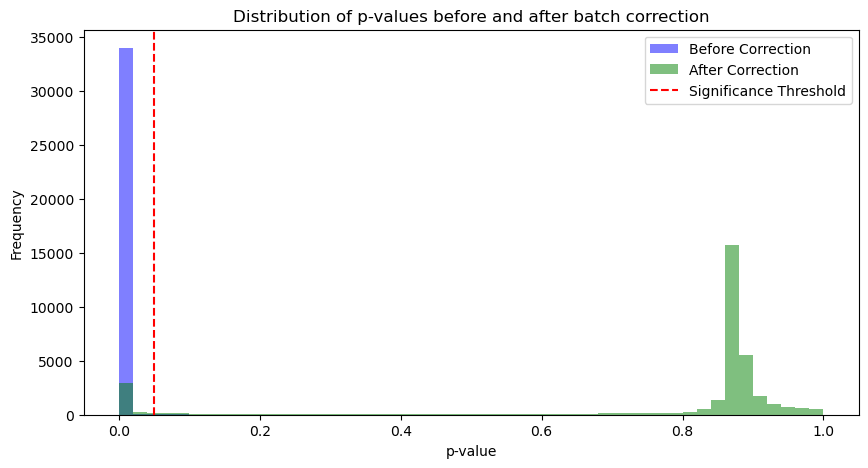

Kolmogorov-Smirnov test p-value: 0.0
Number of significant p-values before correction: 34067
Number of significant p-values after correction: 3211


In [93]:
plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)


In [94]:
p_values_after

array([8.54121456e-01, 8.76476801e-01, 1.86273684e-08, ...,
       8.70879362e-01, 8.31926395e-01, 8.68595975e-01])

## Getting all the experiments p_values


In [95]:
import itertools


In [96]:
expriments_pvalue_before=[]
expriments_pvalue_after=[]
combination_list = []
ks_stats =  []

for experiment_1, experiment_2 in itertools.combinations(experiment_list, 2):
    combination_list.append(f"{experiment_1}-{experiment_2}")
    p_values_before, p_values_after = get_p_values_before_after(data, data_corrected, experiment_1, experiment_2)
    expriments_pvalue_before.append(p_values_before)
    expriments_pvalue_after.append(p_values_after)
    ks_stat, ks_p_value = ks_2samp(p_values_before, p_values_after)
    ks_stats.append({"combination":f"{experiment_1}-{experiment_2}","ks_stat":ks_stat, "ks_pvalue": ks_p_value})



In [97]:
# Convert lists to arrays
expriments_pvalue_before_array = np.array(expriments_pvalue_before)
expriments_pvalue_after_array = np.array(expriments_pvalue_after)

# Calculate average and standard deviation for p-values before and after
avg_p_values_before = np.mean(expriments_pvalue_before_array, axis=1)
std_p_values_before = np.std(expriments_pvalue_before_array, axis=1)
avg_p_values_after = np.mean(expriments_pvalue_after_array, axis=1)
std_p_values_after = np.std(expriments_pvalue_after_array, axis=1)

# Create DataFrame for KS test results
ks_stats_df = pd.DataFrame(ks_stats)


# Add columns for average and standard deviation of p-values before and after
ks_stats_df["avg_p_values_before"] = avg_p_values_before
ks_stats_df["std_p_values_before"] = std_p_values_before
ks_stats_df["avg_p_values_after"] = avg_p_values_after
ks_stats_df["std_p_values_after"] = std_p_values_after


In [98]:
ks_stats_df.drop(columns=["ks_stat", "ks_pvalue"])

,combination,avg_p_values_before,std_p_values_before,avg_p_values_after,std_p_values_after
0,GSE157585-GSE167186,0.005000,0.053349,0.761961,0.283230
1,GSE157585-GSE164471,0.008895,0.071536,0.507267,0.217441
2,GSE157585-GSE60590,0.024618,0.117357,0.066450,0.159543
3,GSE157585-GSE129643,0.011611,0.082365,0.556119,0.222990
4,GSE157585-GSE152558,0.024742,0.116121,0.732831,0.296120
5,GSE167186-GSE164471,0.038595,0.138163,0.530937,0.205921
6,GSE167186-GSE60590,0.004136,0.048732,0.050182,0.156026
7,GSE167186-GSE129643,0.020515,0.107411,0.556896,0.214360
8,GSE167186-GSE152558,0.020305,0.106510,0.644279,0.285227
9,GSE164471-GSE60590,0.010871,0.077427,0.145978,0.183025


In [100]:
ks_stats_df.to_csv(f"ttstat_difference_{technology}_experiments_before_after_combat.csv")

Heatmap the similarity of the experiments

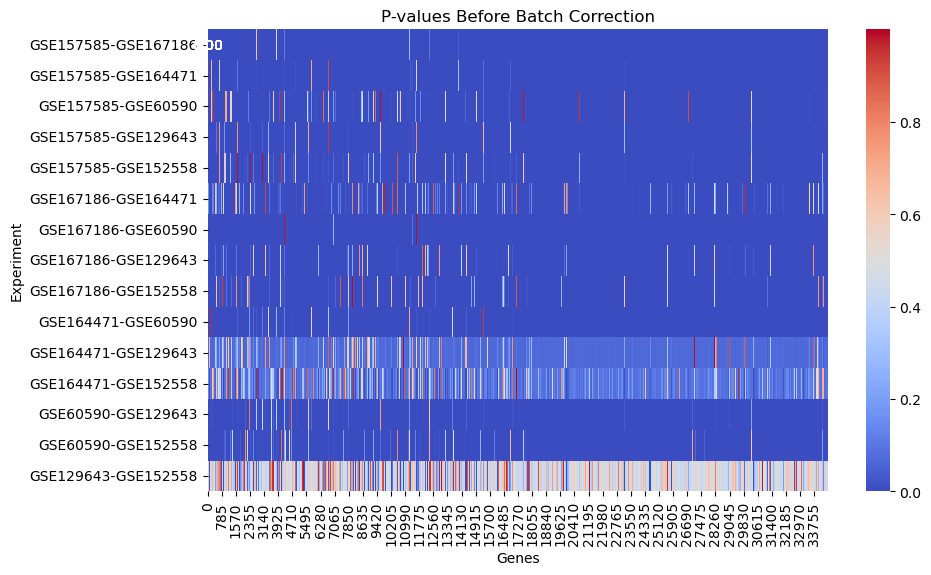

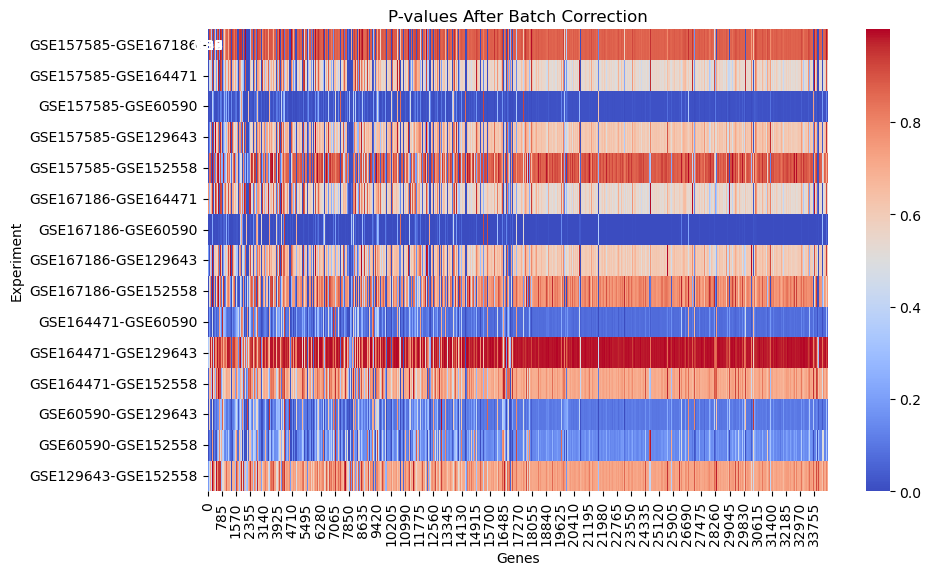

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert lists of p-values to a 2D NumPy array
p_values_before_array = np.array(expriments_pvalue_before)
p_values_after_array = np.array(expriments_pvalue_after)

# Create a heatmap for p-values before batch correction
plt.figure(figsize=(10, 6))
sns.heatmap(p_values_before_array, cmap='coolwarm', annot=True, fmt=".2f", yticklabels=combination_list)
plt.title('P-values Before Batch Correction')
plt.xlabel('Genes')
plt.ylabel('Experiment')
plt.savefig(f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_heatmap_before_2.png")
plt.show()

# Create a heatmap for p-values after batch correction
plt.figure(figsize=(10, 6))
sns.heatmap(p_values_after_array, cmap='coolwarm', annot=True, fmt=".2f", yticklabels=combination_list)
plt.title('P-values After Batch Correction')
plt.xlabel('Genes')
plt.ylabel('Experiment')
plt.savefig(f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_heatmap_after_2.png")
plt.show()

### Looking with the DE genes only

DE only in one experiment

In [105]:
import pandas as pd
experiment="GSE157585"

def get_columns_to_keep_one(experiment):
    # Path to the CSV file
    file_path = f'/home/karen/Documents/phd/Data/Expression_data/Differential Expression/{experiment}_DDS.csv'
    
    # Read the CSV file
    de_genes = pd.read_csv(file_path, index_col=0)
    
    # Filter rows based on condition
    filtered_data = de_genes[(abs(de_genes['log2FoldChange']) > 1) & (de_genes['padj'] < 0.1)]
    
    # Extract column names from filtered data
    columns_to_keep = filtered_data["row"].str.strip().tolist()
    return columns_to_keep

# Assuming p_values_before is another DataFrame you want to filter columns from
# Replace p_values_before with your DataFrame name
#filtered_columns = p_values_before[columns_to_keep]

# Now you can work with the filtered columns DataFrame as needed


In [106]:
if technology =="RNAseq":
    columns_to_keep = get_columns_to_keep_one(experiment)

In [107]:
if technology =="RNAseq":
    len(columns_to_keep)

In [108]:
#filter_Bools = [(abs(de_genes['log2FoldChange']) > 1) & (de_genes['padj'] < 0.1)][0]

In [109]:
#p_values_after[x]

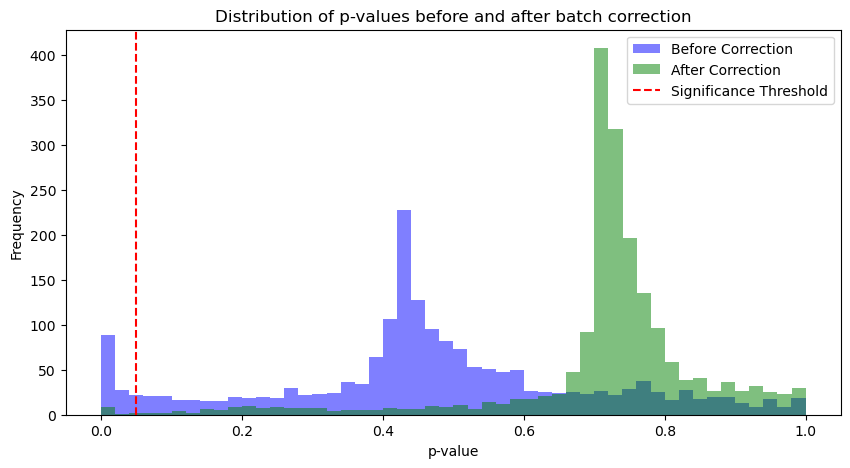

Kolmogorov-Smirnov test p-value: 0.0
Number of significant p-values before correction: 133
Number of significant p-values after correction: 11


In [110]:
if technology =="RNAseq":

    DE_data = data.copy()
    DE_data_corrected = data_corrected.copy()
    
    DE_data= DE_data.T
    DE_data = DE_data[columns_to_keep]
    DE_data_corrected = DE_data_corrected[columns_to_keep]
    DE_data= DE_data.T
    
    p_values_before, p_values_after = get_p_values_before_after(DE_data, DE_data_corrected, experiment_1, experiment_2)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)


In [111]:
if technology =="RNAseq":
    DE_data_corrected

In [112]:
if technology =="RNAseq":
    DE_data

In [113]:
if technology =="RNAseq":
    DE_data.columns

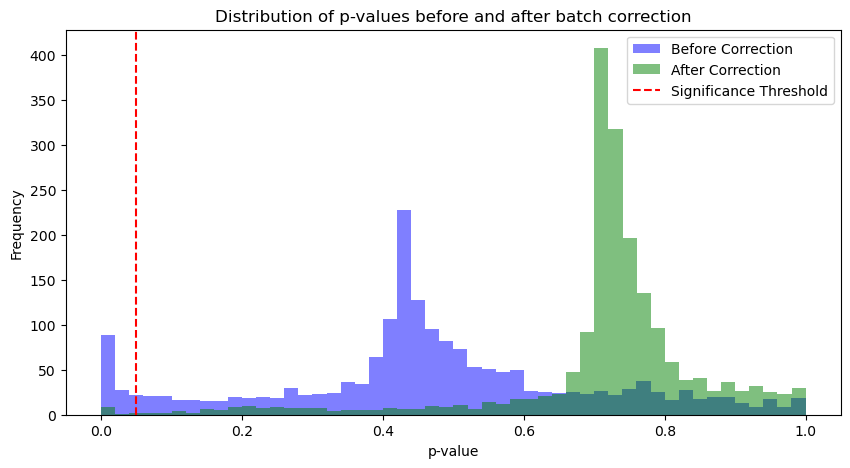

Kolmogorov-Smirnov test p-value: 0.0
Number of significant p-values before correction: 133
Number of significant p-values after correction: 11


In [114]:
if technology =="RNAseq":

    
    data_before = data.copy()
    data_before = data_before.T
    
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    group_a_samples_before.columns=data.index
    group_b_samples_before.columns=data.index
    group_a_samples_before = group_a_samples_before[columns_to_keep]
    group_b_samples_before = group_b_samples_before[columns_to_keep]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    
    
    data_corrected.reset_index(drop=True, inplace=True)
    
    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    
    group_a_samples_corrected.columns=data.index
    group_b_samples_corrected.columns=data.index
    group_a_samples_corrected = group_a_samples_corrected[columns_to_keep]
    group_b_samples_corrected = group_b_samples_corrected[columns_to_keep]
    t_statistic, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)


## Checking random genes

In [58]:
import random
if technology =="RNAseq":
    random_values = random.sample(de_genes["row"].tolist(), len(columns_to_keep))


NameError: name 'de_genes' is not defined

In [ ]:
if technology =="RNAseq":
    
    data_before = data.copy()
    data_before = data_before.T
    
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    group_a_samples_before.columns=data.index
    group_b_samples_before.columns=data.index
    group_a_samples_before = group_a_samples_before[random_values]
    group_b_samples_before = group_b_samples_before[random_values]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    
    
    data_corrected.reset_index(drop=True, inplace=True)
    
    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    
    group_a_samples_corrected.columns=data.index
    group_b_samples_corrected.columns=data.index
    group_a_samples_corrected = group_a_samples_corrected[random_values]
    group_b_samples_corrected = group_b_samples_corrected[random_values]
    t_statistic, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)

## checking DE in both groups

In [ ]:
import pandas as pd
if technology =="RNAseq":
    
    # Path to the CSV file
    file_path_1 = f'/home/karen/Documents/phd/Data/Expression_data/Differential Expression/{experiment_1}_DDS.csv'
    file_path_2 = f'/home/karen/Documents/phd/Data/Expression_data/Differential Expression/{experiment_2}_DDS.csv'
    
    # Read the CSV file
    de_genes_1 = pd.read_csv(file_path_1, index_col=0)
    de_genes_2 = pd.read_csv(file_path_2, index_col=0)
    
    # Filter rows based on condition
    filtered_data_1 = de_genes_1[(abs(de_genes_1['log2FoldChange']) > 1) & (de_genes_1['padj'] < 0.1)]
    filtered_data_2 = de_genes_2[(abs(de_genes_2['log2FoldChange']) > 1) & (de_genes_2['padj'] < 0.1)]
    
    union_filter = pd.concat([filtered_data_1, filtered_data_2]).drop_duplicates()
    intersection_filter = pd.merge(filtered_data_1, filtered_data_2, on='row', how='inner')
    
    # Extract column names from filtered data
    union_keep = union_filter["row"].str.strip().tolist()
    intersection_keep = intersection_filter["row"].str.strip().tolist()


In [ ]:
if technology =="RNAseq":
    
    
    data_before = data.copy()
    data_before = data_before.T
    
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    group_a_samples_before.columns=data.index
    group_b_samples_before.columns=data.index
    group_a_samples_before = group_a_samples_before[intersection_keep]
    group_b_samples_before = group_b_samples_before[intersection_keep]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    
    
    data_corrected.reset_index(drop=True, inplace=True)
    
    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    
    group_a_samples_corrected.columns=data.index
    group_b_samples_corrected.columns=data.index
    group_a_samples_corrected = group_a_samples_corrected[intersection_keep]
    group_b_samples_corrected = group_b_samples_corrected[intersection_keep]
    t_statistic, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)

Checking the same experiment before and after

In [ ]:
if technology =="RNAseq":
    
    t_statistic, p_values_a = ttest_ind(group_a_samples_before, group_a_samples_corrected)
    t_statistic, p_values_b = ttest_ind(group_b_samples_before, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_a, p_values_b, alpha = 0.05)

# Cluster data before and after

In [115]:
metadata_short =  pd.DataFrame({
    'Experiment': experiment_order,
    'Age': age_order,
    'Sample': sample_order
})
metadata_short.set_index('Sample', inplace=True)
metadata_short

,Experiment,Age
Sample,,
SRR13388732,GSE164471,Young
SRR13388733,GSE164471,Young
SRR13388734,GSE164471,Young
SRR13388735,GSE164471,Young
SRR13388736,GSE164471,Young
...,...,...
SRR8882198,GSE129643,Young
SRR8882200,GSE129643,Young
SRR8882202,GSE129643,MiddleAge


In [116]:
data_corrected.index = cts["Sample"]

In [117]:
adjuested_data_full = pd.concat([data_corrected, metadata_short], axis=1)

In [118]:
unadjested_data_full= pd.concat([cts_processed, metadata_short], axis=1)

In [119]:
adjuested_data_full.columns[10:]

Index(['ENSG00000001460.17', 'ENSG00000001461.16', 'ENSG00000001497.16',
       'ENSG00000001617.11', 'ENSG00000001626.14', 'ENSG00000001629.9',
       'ENSG00000001630.15', 'ENSG00000001631.15', 'ENSG00000002016.17',
       'ENSG00000002079.14',
       ...
       'ENSG00000285471.1', 'ENSG00000285472.1', 'ENSG00000285476.1',
       'ENSG00000285480.1', 'ENSG00000285491.1', 'ENSG00000285505.1',
       'ENSG00000285508.1', 'ENSG00000285509.1', 'Experiment', 'Age'],
      dtype='object', length=34497)

In [120]:
cts_2 = cts.set_index("Sample")
cts_2

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,ENSG00000001167.14,...,ENSG00000285472.1,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1,Experiment,Age,Sample.1
Sample,,,,,,,,,,,,,,,,,,,,,
SRR13388732,3.346531,0.000000,7.023940,0.705439,3.879328,0.275243,7.746350,6.574690,8.136232,3.166290,...,0.311412,0.439481,0.000000,0.000000,0.000000,4.61464,0.142626,GSE164471,23.0,SRR13388732
SRR13388733,7.351350,0.000000,13.916237,4.891812,2.885359,0.190321,16.006573,6.498180,10.725815,7.545120,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.80200,1.119540,GSE164471,28.0,SRR13388733
SRR13388734,7.671751,1.624510,18.720030,3.338030,9.629021,0.204143,19.061782,7.368540,11.420381,6.801920,...,0.000000,0.167163,0.000000,0.418267,0.000000,2.37204,0.915094,GSE164471,31.0,SRR13388734
SRR13388735,2.547355,0.184514,6.876067,0.888782,1.684829,0.000000,3.182537,2.415355,2.242850,1.916299,...,0.000000,0.148800,0.000000,0.000000,0.000000,5.20632,0.813373,GSE164471,31.0,SRR13388735
SRR13388736,15.728966,0.613411,14.120093,3.123864,10.457990,0.198544,12.340000,19.441760,18.223213,3.726510,...,1.544910,1.069550,0.379249,0.000000,0.000000,3.39066,0.707502,GSE164471,35.0,SRR13388736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR8882198,1.832683,0.000000,2.567454,0.617939,1.599221,0.338734,2.457767,1.825564,5.485286,2.604403,...,0.043890,0.109543,0.131619,0.115910,0.023606,1.51306,0.347812,GSE129643,27.0,SRR8882198
SRR8882200,2.251713,0.000000,2.120141,0.895718,2.379145,0.418938,1.489740,2.676330,1.880811,0.663090,...,0.000000,0.156295,0.000000,0.078959,0.000000,1.51426,0.129535,GSE129643,33.0,SRR8882200
SRR8882202,1.387888,0.057285,5.080017,1.439485,1.263484,0.194929,3.880208,2.066827,5.226251,2.951940,...,0.000000,0.000000,0.090303,0.000000,0.000000,2.29948,0.106928,GSE129643,37.0,SRR8882202


In [121]:
adjuested_data_full["Age"]=cts_2["Age"]
adjuested_data_full

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,ENSG00000001167.14,...,ENSG00000285471.1,ENSG00000285472.1,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1,Experiment,Age
Sample,,,,,,,,,,,,,,,,,,,,,
SRR13388732,-0.024640,-0.027469,-0.007903,-0.026124,-0.026015,-0.026864,-0.021406,-0.022678,-0.022670,-0.025245,...,-0.027402,-0.027306,-0.027267,-0.026753,-0.027502,-0.027457,-0.024058,-0.027476,GSE164471,23.0
SRR13388733,-0.025765,-0.032593,-0.006575,-0.027678,-0.031369,-0.031862,-0.016857,-0.026578,-0.023808,-0.026064,...,-0.032615,-0.032575,-0.032619,-0.031722,-0.032605,-0.032541,-0.020310,-0.031807,GSE164471,28.0
SRR13388734,-0.030008,-0.036930,-0.005061,-0.034131,-0.029369,-0.037718,-0.015247,-0.030479,-0.027006,-0.031353,...,-0.037149,-0.038608,-0.038491,-0.037602,-0.038201,-0.038558,-0.036063,-0.037850,GSE164471,31.0
SRR13388735,-0.021340,-0.023615,-0.006280,-0.022375,-0.023463,-0.023325,-0.020330,-0.021371,-0.022376,-0.022207,...,-0.023713,-0.023718,-0.023678,-0.023091,-0.023741,-0.023709,-0.020413,-0.023409,GSE164471,31.0
SRR13388736,-0.019630,-0.034585,-0.005184,-0.031186,-0.026442,-0.034297,-0.022105,-0.015811,-0.017068,-0.031275,...,-0.034271,-0.033711,-0.034180,-0.033844,-0.035117,-0.035025,-0.031728,-0.034582,GSE164471,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR8882198,-0.019347,-0.020624,-0.006916,-0.019726,-0.021029,-0.020251,-0.018818,-0.019547,-0.019239,-0.019442,...,-0.020646,-0.020656,-0.020655,-0.020141,-0.020636,-0.020647,-0.019357,-0.020567,GSE129643,27.0
SRR8882200,-0.017227,-0.018656,-0.005793,-0.017702,-0.018829,-0.018341,-0.017029,-0.017344,-0.018774,-0.018166,...,-0.018656,-0.018721,-0.018691,-0.018296,-0.018702,-0.018711,-0.017394,-0.018682,GSE129643,33.0
SRR8882202,-0.018888,-0.020402,-0.004026,-0.018965,-0.020680,-0.020123,-0.017272,-0.018718,-0.018240,-0.018554,...,-0.020442,-0.020437,-0.020472,-0.019981,-0.020491,-0.020452,-0.018820,-0.020405,GSE129643,37.0


In [122]:
adjuested_data_full.to_csv(f"/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/{technology}_abundances_adjusted_combat_2.csv")

In [67]:
#unadjested_data_full.to_csv(f"/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/{technology}_All_abundances_unadjusted_2.csv")

Looking at reCombat plotting

In [123]:
X = data_corrected.fillna(0, inplace=False).values 

In [124]:
X

array([[-0.02464049, -0.02746877, -0.00790255, ..., -0.02745719,
        -0.02405811, -0.02747623],
       [-0.02576451, -0.03259259, -0.00657521, ..., -0.03254128,
        -0.02030996, -0.03180717],
       [-0.03000798, -0.03692963, -0.00506083, ..., -0.03855791,
        -0.03606304, -0.03784996],
       ...,
       [-0.01888754, -0.02040163, -0.0040255 , ..., -0.02045153,
        -0.0188201 , -0.02040502],
       [-0.01772512, -0.01916808, -0.00373316, ..., -0.01921217,
        -0.01745437, -0.01914677],
       [-0.01949601, -0.02119682, -0.00298297, ..., -0.02146086,
        -0.02067384, -0.02133282]])

In [125]:

# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(experiment_order)}
if technology =="RNAseq":
    category_map = {'GSE164471': -1, 'GSE152558': 0, 'GSE157585': 1, 'GSE167186':2, "GSE60590":3, "GSE129643":4}
elif technology == "microarray":
    category_map = {'GSE13070':-6, 'GSE47969':-5, 'GSE48278':-4, 'GSE9103':-3, 'GSE59880':-2, 'GSE9676':-1, 'GSE161643':0, 'GSE8157':1, 'GSE1428':2, 'GSE38718':3, 'GSE6348':4, 'GSE40551':5, 'GSE87105':6, 'GSE674_2':7}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in experiment_order]

from matplotlib.colors import ListedColormap
tab20_colors = plt.cm.tab20.colors
num_colors = len(np.unique(experiment_order))
colors = [tab20_colors[i] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)


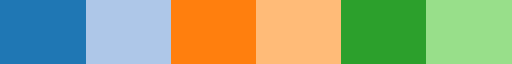

In [126]:
custom_cmap

Using tSNE


In [127]:
from sklearn.manifold import TSNE
X = data_corrected.values 
tSNE=TSNE(n_components=2)
tSNE_result=tSNE.fit_transform(X)
# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
x=tSNE_result[:,0]
y=tSNE_result[:,1]

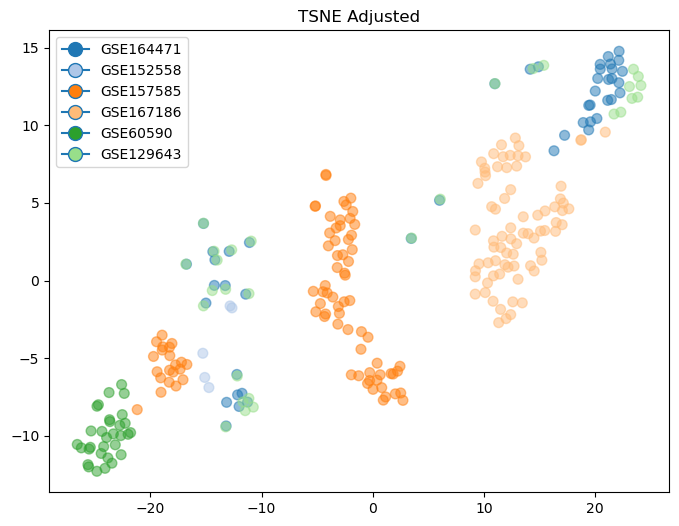

In [128]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Adjusted')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_Combat_by_experiment_2.png"
plt.savefig(save)

Using PCA

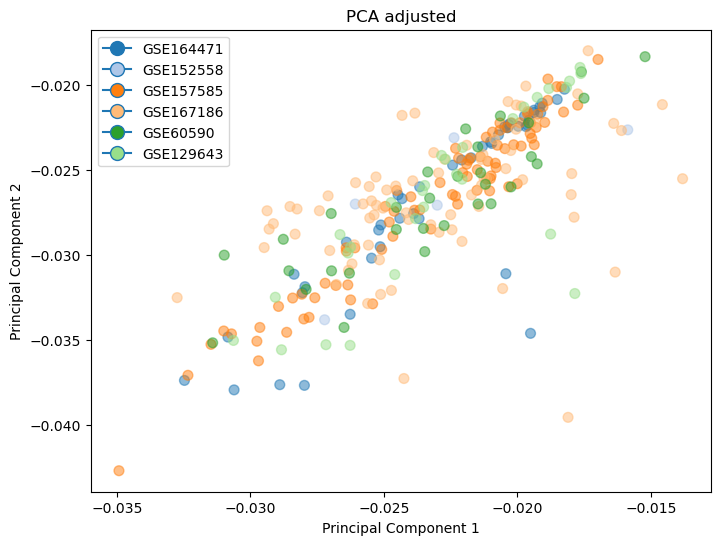

In [73]:

#

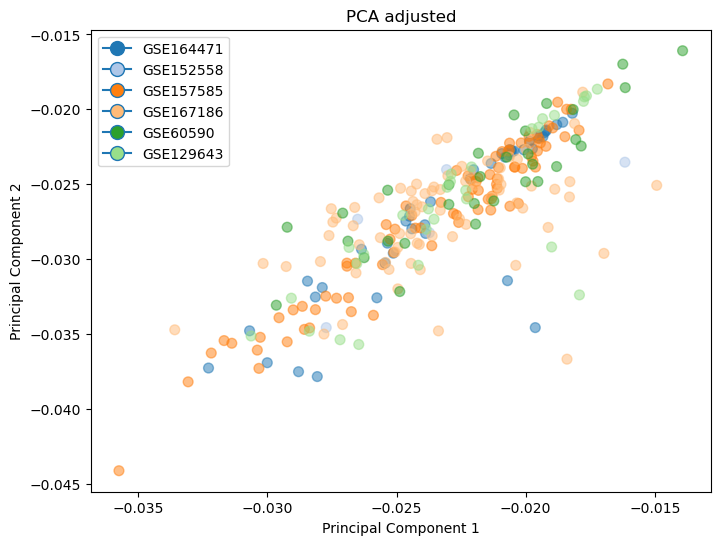

In [129]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA adjusted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_Combat_by_experiment_2.png"
plt.savefig(save)

Lookign at the age

In [130]:



# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(age_order)}
category_map = {'Young': -1,  'MiddleAge': 0, 'Old': 1}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_age_order = [category_map[experiment] for experiment in age_order]
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(age_order))
colors = [tab20_colors[i] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)


In [131]:
pd.DataFrame(age_order).value_counts()

Old          135
Young         93
MiddleAge     42
Name: count, dtype: int64

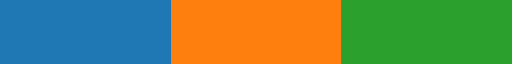

In [132]:
custom_cmap

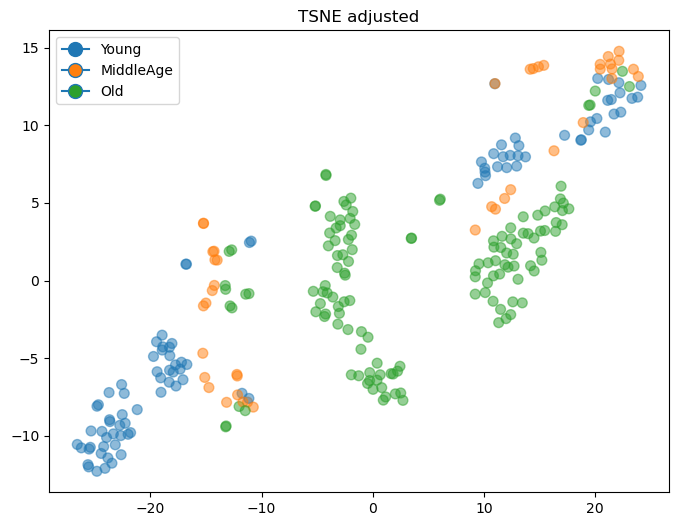

In [133]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE adjusted')

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_Combat_by_age_2.png"
plt.savefig(save)
#plt.savefig("TSNE_Scatter_Plot_Age_reCombat.jpg")

tSNE

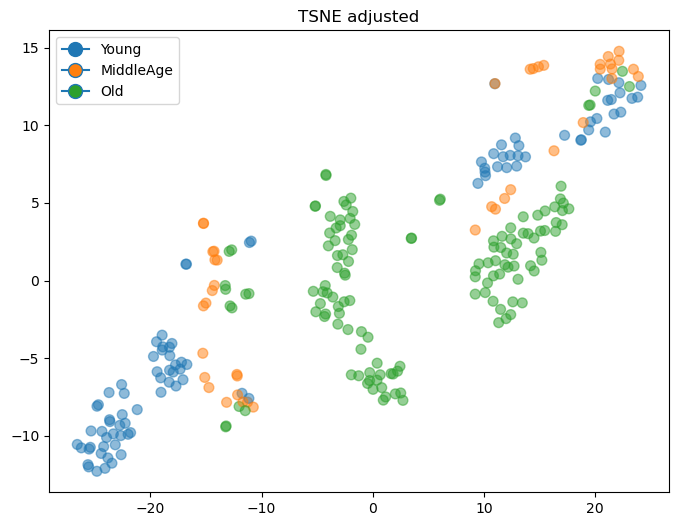

In [134]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE adjusted')

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_Combat_by_age_2.png"
plt.savefig(save)
#plt.savefig("TSNE_Scatter_Plot_Age_reCombat.jpg")

PCA

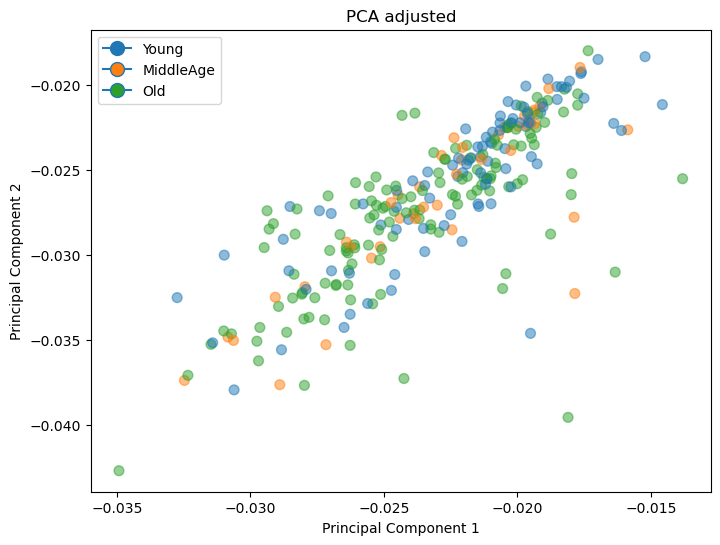

In [79]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA adjusted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_Combat_by_age.png"
plt.savefig(save)
# plt.savefig("PCA_Scatter_Plot_Age_reCombat.jpg")

Unadjusted

In [80]:
X = cts_processed.values 


tSNE by experiment

In [81]:

tSNE=TSNE(n_components=2)
tSNE_result=tSNE.fit_transform(X)
# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
x=tSNE_result[:,0]
y=tSNE_result[:,1]

In [82]:
# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(experiment_order)}
if technology =="RNAseq":
    category_map = {'GSE164471': -1, 'GSE152558': 0, 'GSE157585': 1, 'GSE167186':2, "GSE60590":3, "GSE129643":4}
elif technology == "microarray":
    category_map = {'GSE13070':-6, 'GSE47969':-5, 'GSE48278':-4, 'GSE9103':-3, 'GSE59880':-2, 'GSE9676':-1, 'GSE161643':0, 'GSE8157':1, 'GSE1428':2, 'GSE38718':3, 'GSE6348':4, 'GSE40551':5, 'GSE87105':6, 'GSE674_2':7}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in experiment_order]

from matplotlib.colors import ListedColormap
tab20_colors = plt.cm.tab20.colors
num_colors = len(np.unique(experiment_order))
colors = [tab20_colors[i ] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)

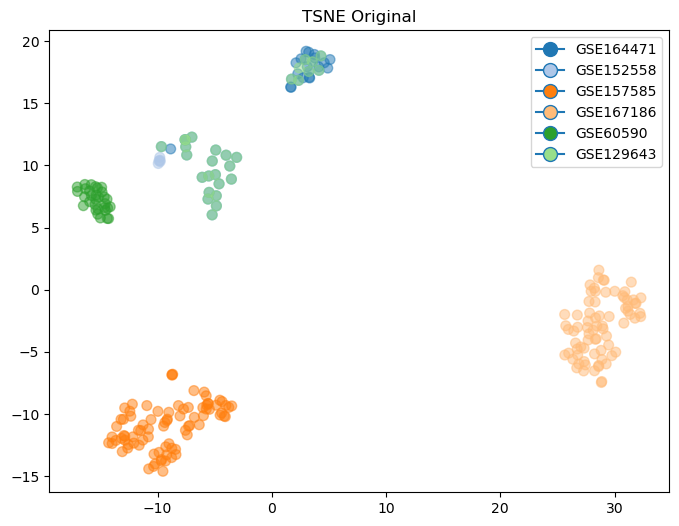

In [83]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Original')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_Original_by_experiment.png"
plt.savefig(save)
#plt.savefig("TSNE_Scatter_Plot_Experiment_Original.jpg")

PCA by experiment original

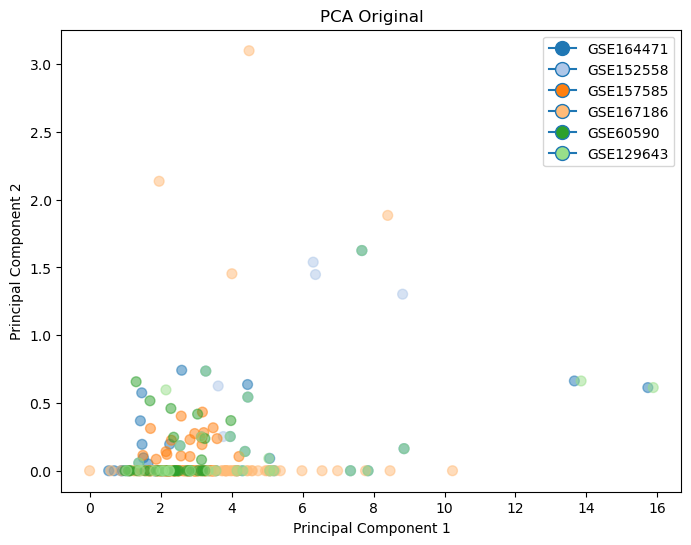

In [84]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA Original')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_Original_by_experiment.png"
plt.savefig(save)
#plt.savefig("PCA_Scatter_Plot_Experiment_Original.jpg")

By age

In [85]:

# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(age_order)}
category_map = {'Young': -1,  'MiddleAge': 0, 'Old': 1}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_age_order = [category_map[experiment] for experiment in age_order]
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(age_order))
colors = [tab20_colors[i % 20] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)

TSNE by age

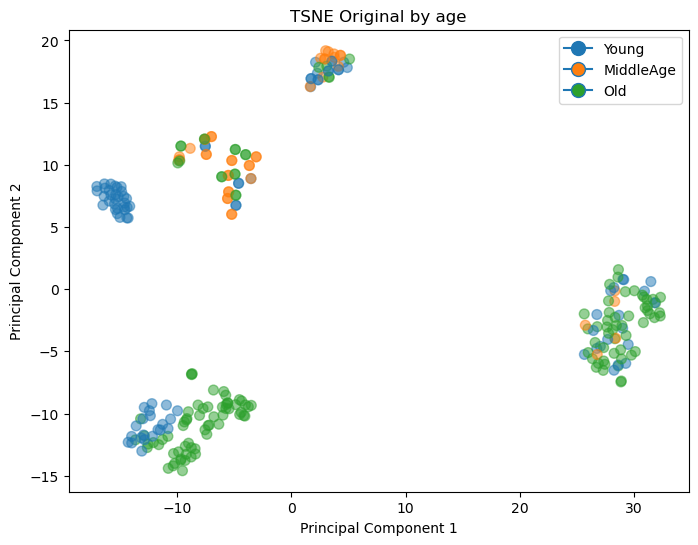

In [86]:


# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Original by age')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_Original_by_age.png"
plt.savefig(save)
#plt.savefig("TSNE_Scatter_Plot_Age_Original.jpg")

PCA by age original

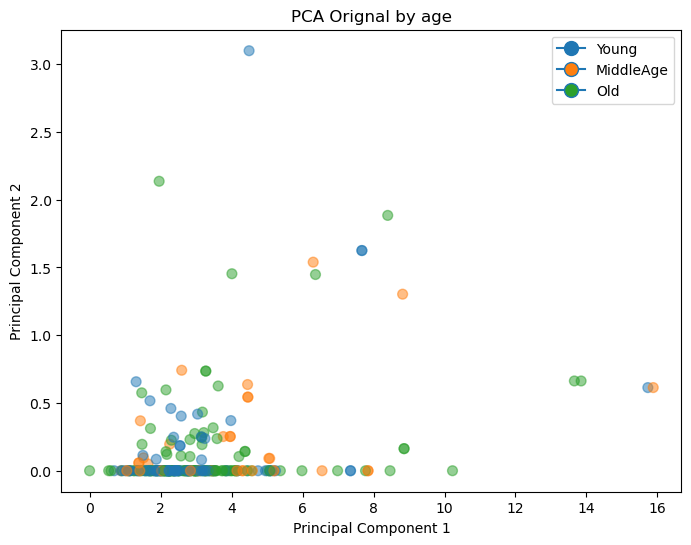

In [87]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA Orignal by age')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_Original_by_age.png"
plt.savefig(save)
#plt.savefig("PCA_Scatter_Plot_Age_Original.jpg")

UMAP